# Notebook - jeu de données Titanic :

**Présentation du jeu de données :** Le jeu de données titanic s'inspire de données fictives inspirées de l'histoire du naufrage du Titanic en 1912. Il contient des données, réparties en 10 variables, sur l'ensemble des passagers du titanic.

Ces données, ainsi que leur nomination, sont décrites ci-dessous :
- PassengerId (int) : Identifiant unique du passager (inutile pour la prédiction).
- Name (str) : Nom complet du passager, souvent utilisé pour extraire des informations sur le titre ("Mr.", "Mrs.", etc.).
- Sex (str) : Sexe du passager ("male", "female").
- Age (float) : Âge du passager (peut contenir des valeurs manquantes).
- Parch (int) : Nombre de parents et/ou enfants à bord avec le passager.
- SibSp (int) : Nombre de frères/sœurs et/ou conjoints à bord.
- Embarked (str) : Port d'embarquement du passager ("C" pour Cherbourg, "Q" pour Queenstown, "S" pour Southampton).
- Pclass (int) : Classe de billet (1 = Première classe, 2 = Deuxième classe, 3 = Troisième classe), qui reflète le statut socio-économique.
- Fare (float) : Tarif payé pour le billet (en livres sterling).
- Cabin (str) : Numéro de la cabine (contient de nombreuses valeurs manquantes).

Ce jeu de données sert pour la classificatoin. L'objectif  est d'être capable de prédire quels passagers fictifs survivront, et ceux qui malheuresement décèderont.

**Objectifs :** on se fixe comme objectifs de réaliser une étude visant à réaliser un pré-traitement avec gestion des valeurs manquantes, séléction de variables, détéction des outliers. Ensuite, en fonction des résultats, on présentera plusieurs méthodes de discriminations du résultat sur la survie.

On précise ici qu'on a connaissance qu'une compétition Kaggle a eu lieu sur ce jeu de donneés. Néanmoins, dans une volonté de s'approprier les outils d'apprentissage automatique, cette compétition n'a pas été consultée.

**Source :** https://www.kaggle.com/competitions/titanic

# I. Import des bibliothèques et du dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### import du data set train
tc_train = pd.read_csv(r"C:\Users\rapha\OneDrive\Bureau\IODAA\Cours AgroParisTech\IA Prog - Vincent GUIGUE\Projet\11.11.24 - Titanic\titanic\train.csv")
# print(tc_train.head())

### import du data set test
tc_test = pd.read_csv(r"C:\Users\rapha\OneDrive\Bureau\IODAA\Cours AgroParisTech\IA Prog - Vincent GUIGUE\Projet\11.11.24 - Titanic\titanic\test.csv")
# print(tc_test.head())

In [3]:
# Vérification de la bonne importation et première observation des
# paramètres du jeu de données (dimensions, valeurs manquantes, etc...)
tc_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# II. Analyse du nombre de passagers et des proportions train/test

In [4]:
print("dimension de la matrice d'entrainement :", tc_train.shape)
print("nombre de passagers inclu dans l'entrainement :", tc_train.shape[0])

print("dimension de la matrice de test :", tc_test.shape)
print("nombre de passagers inclu dans l'entrainement :", tc_test.shape[0])

nb_passagers_total = tc_train.shape[0] + tc_test.shape[0]
print("proportion entrainement/test :", tc_train.shape[0]/nb_passagers_total * 100, tc_test.shape[0]/nb_passagers_total * 100)

dimension de la matrice d'entrainement : (891, 12)
nombre de passagers inclu dans l'entrainement : 891
dimension de la matrice de test : (418, 11)
nombre de passagers inclu dans l'entrainement : 418
proportion entrainement/test : 68.0672268907563 31.932773109243694


<span style = "color:magenta"> La répartition du jeu de données en ensemble d'apprentissage et de test et satisfaisante (proportion et nombre d'exemples).

# III. Première analyse du type pour chaque variables et des valeurs manquantes pour chaque variables :

## III. A. Types de chaque variables associées au dataset

In [5]:
# Obtention des types de chaque colonne
types_colonnes = tc_train.dtypes

print("Types de chaque colonne :")
print(types_colonnes)

Types de chaque colonne :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<span style = "color:magenta"> On observe trois type de variables : int, object et float. Une première remarque est que les variables du type : "int" ou "object" sont mal pris en compte par les modèles d'apprentissage automatique. Un encodage de ces variables sera effectués dans un premier traitement des données.

## III. B. Première observation des valeurs manquantes

In [6]:
#calcul du nombre de valeurs manquantes par colonnes
vm = tc_train.isnull().sum()

# Affichage de la proportion par colonne arrondie à 2 décimales
proportion_vm = (vm[vm > 0] / tc_train.shape[0] * 100).round(2)

print("Proportion de valeurs manquantes par colonne :")
print(proportion_vm)

Proportion de valeurs manquantes par colonne :
Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64


<span style = "color:magenta"> On observe de nombres valeurs manquantes sur age et cabine. Une statégie est utilisée pour éliminer ces valeurs manquantes :

In [7]:
# Remplacer les valeurs manquantes par 'No Cabin'
tc_train['Cabin'].fillna('No Cabin', inplace=True)

# Supprimer les lignes où la colonne 'Embarked' contient des valeurs manquantes
tc_train = tc_train.dropna(subset=['Embarked'])

# Imputation sur age des valeurs manquantes via la médiane
tc_train['Age'].fillna(tc_train['Age'].median(), inplace=True)

C:\Users\rapha\AppData\Local\Temp\ipykernel_48092\53861272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc_train['Cabin'].fillna('No Cabin', inplace=True)
C:\Users\rapha\AppData\Local\Temp\ipykernel_48092\53861272.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

- <span style = "color:magenta"> Tout d'abord, au vu du faible nombre de valeurs manquantes de la variables Embarked, les lignes contenant des valeurs manquantes sont supprimées.

- <span style = "color:magenta"> De plus, une analyse de la bibliographie nous permet d'observer que les personnes sans numéro de cabine étaient plus précisemment logées dans des dortoires, il ne s'agit donc pas de "réelles" valeurs manquantes, mais d'une façon de noter une différence. On attribue donc la valeur "No cabin" a ces personnes. Puis on séléctionnera enfin la première lettre de la chaine de caractère. On a vérifié auparavant que la cabine "N" n'existait pas dans les données.

- <span style = "color:magenta">  Enfin, on réalise un remplacement des valeurs manquantes par la médianne.

In [8]:
# Check si toutes les valeurs ont bien été supprimées :

#calcul du nombre de valeurs manquantes par colonnes
vm = tc_train.isnull().sum()

# Affichage de la proportion par colonne arrondie à 2 décimales
proportion_vm = (vm[vm > 0] / tc_train.shape[0] * 100).round(2)

print("Proportion de valeurs manquantes par colonne :")
print(proportion_vm)

Proportion de valeurs manquantes par colonne :
Series([], dtype: float64)


In [9]:
# Vérification visuelle de tc_train
tc_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,No Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,No Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<span style = "color:magenta">  Ainsi les valeurs manquantes ont bien été supprimées.

# IV. Analyse univariée des variables

<span style = "color:magenta">  Dans cette partie IV, on propose une analyse brève et visuelle du jeu de données. On accède donc à une première informations sur la distribution des valeurs, les point aberrants, ou encore la moyenne et les quartiles pour chaque variables considérées.

## IV. A. Classe des passagers

count    889.000000
mean       2.311586
std        0.834700
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Nombre de passagers par classe :
Pclass
3    491
1    214
2    184
Name: count, dtype: int64 Pclass
3    55.230596
1    24.071991
2    20.697413
Name: count, dtype: float64


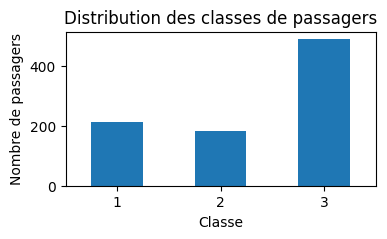

In [10]:
# Statistiques descriptives pour la colonne Pclass
print(tc_train['Pclass'].describe())

# Compter le nombre de passagers par classe
count_pclass = tc_train['Pclass'].value_counts()
print("Nombre de passagers par classe :")
print(count_pclass, count_pclass/tc_train.shape[0] * 100)

# Histogramme de Pclass
plt.figure(figsize=(4, 2))
tc_train['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution des classes de passagers')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

## IV. B. Sexe des passagers

count      889
unique       2
top       male
freq       577
Name: Sex, dtype: object
Nombre de passagers par sexe :
Sex
male      577
female    312
Name: count, dtype: int64 Sex
male      0.649044
female    0.350956
Name: count, dtype: float64


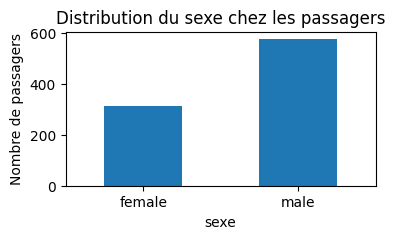

In [11]:
# Statistiques descriptives pour la colonne sex
print(tc_train['Sex'].describe())

# Compter le nombre de passagers par sexe
count_sex = tc_train['Sex'].value_counts()
print("Nombre de passagers par sexe :")
print(count_sex, count_sex/tc_train.shape[0])

# # Histogramme de Pclass
plt.figure(figsize=(4, 2))
tc_train['Sex'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution du sexe chez les passagers')
plt.xlabel('sexe')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

## IV. C. Age des passagers

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


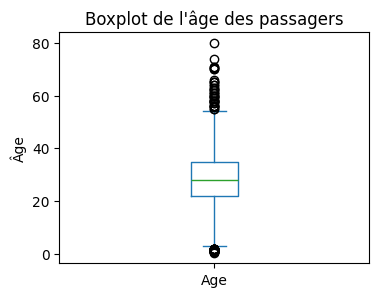

In [12]:
# Statistiques descriptives pour la colonne age
print(tc_train['Age'].describe())

# Boxplot de la distribution de l'âge
plt.figure(figsize=(4, 3))
tc_train['Age'].dropna().plot(kind='box')
plt.title('Boxplot de l\'âge des passagers')
plt.ylabel('Âge')
plt.show()

Text(0.5, 1.0, "Distribution de l'âge des passagers")

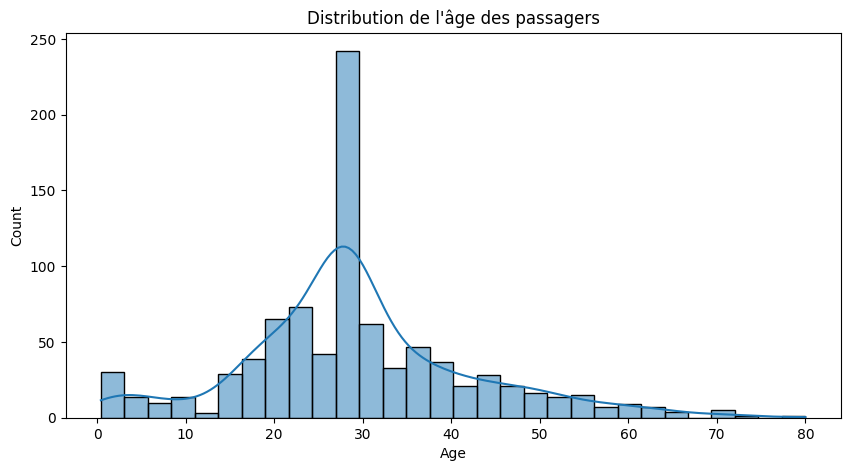

In [13]:
# Histogramme sur l'âge des passagers
plt.figure(figsize=(10,5))
sns.histplot(tc_train["Age"], 
             kde = True) # Affichage de la fréquence par noyau gaussien
plt.title("Distribution de l'âge des passagers")

## IV. D. Nombre de parents nucléaires, parents et conjoints

# of siblings/spouses in the titanic : count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
# of parents/children in the titanic : count    889.000000
mean       0.382452
std        0.806761
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


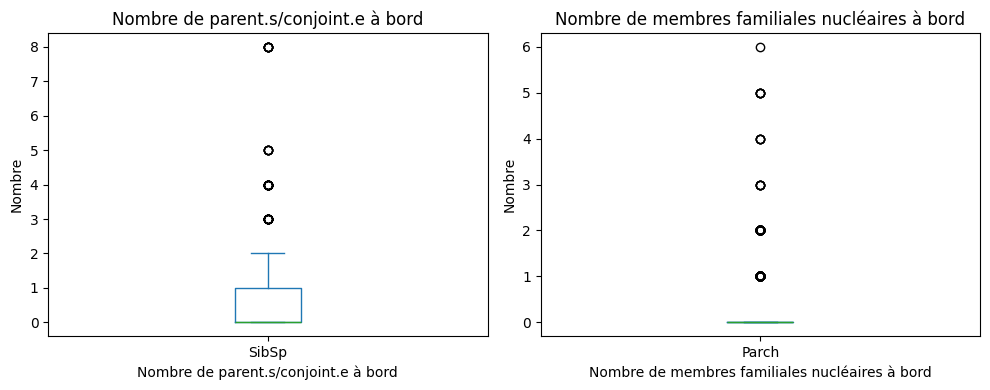

In [14]:
# statistiques descriptives pour la colonne SibSp
print("# of siblings/spouses in the titanic :", tc_train['SibSp'].describe()) #Ajouter .dropna() ? je ne sais pas encore
print("# of parents/children in the titanic :", tc_train['Parch'].describe())

# Créer une figure avec des sous-graphes
plt.figure(figsize=(10, 4))

# Boxplot pour la distribution des parents/conjoints
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er sous-graphe
tc_train['SibSp'].dropna().plot(kind='box')
plt.title('Nombre de parent.s/conjoint.e à bord')
plt.ylabel('Nombre')
plt.xlabel('Nombre de parent.s/conjoint.e à bord')

# Boxplot pour la distribution des relations interfamiliales nucléaires
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e sous-graphe
tc_train['Parch'].dropna().plot(kind='box')
plt.title('Nombre de membres familiales nucléaires à bord')
plt.ylabel('Nombre')
plt.xlabel('Nombre de membres familiales nucléaires à bord')

# Afficher le graphique
plt.tight_layout()  # Ajuste l'espacement pour éviter le chevauchement
plt.show()

## IV. E. Analyse de la colonne "Fare"

float64
float64
0


C:\Users\rapha\AppData\Local\Temp\ipykernel_48092\2731694993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc_train['Fare'] = pd.to_numeric(tc_train['Fare'], errors='coerce')


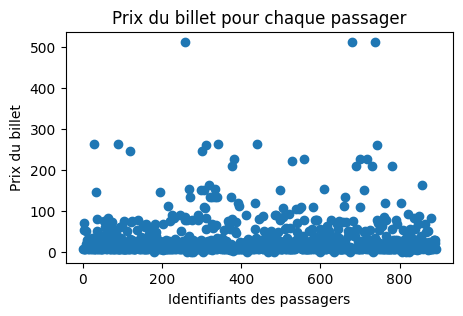

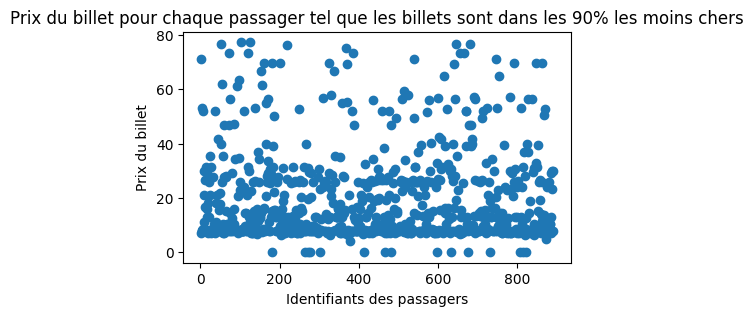

In [15]:
# print(tc_train['Fare'].unique())
print(tc_train['Fare'].dtype)

# conversion des de la colonne Fare en type float = plus facile à traiter
tc_train['Fare'] = pd.to_numeric(tc_train['Fare'], errors='coerce')
print(tc_train['Fare'].dtype)  # Devrait maintenant être float64

# calcul du nombre de valeurs manquantes par colonnes
print(tc_train['Fare'].isnull().sum()) #aucune valeurs manquantes


plt.figure(figsize=(5, 3))
plt.scatter(tc_train.PassengerId, tc_train.Fare)
plt.title("Prix du billet pour chaque passager")
plt.xlabel("Identifiants des passagers")
plt.ylabel("Prix du billet")
plt.show()

Fare_90_sorted = tc_train[tc_train['Fare'] <= tc_train['Fare'].quantile(0.90)]['Fare']
PassengerId_90_sorted = tc_train[tc_train['Fare'] <= tc_train['Fare'].quantile(0.90)]['PassengerId']

plt.figure(figsize=(5, 3))
plt.scatter(PassengerId_90_sorted, Fare_90_sorted)
plt.title("Prix du billet pour chaque passager tel que les billets sont dans les 90% les moins chers")
plt.xlabel("Identifiants des passagers")
plt.ylabel("Prix du billet")
plt.show()

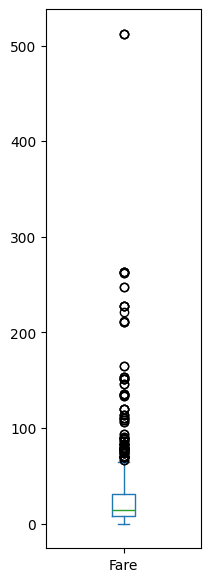

In [16]:
# Analyse descriptives de la colonne Fare
tc_train['Fare'].describe()

# Boxplot pour distribution du prix du billet
plt.figure(figsize=(2,7))
tc_train['Fare'].dropna().plot(kind='box')
plt.show()

Text(0.5, 1.0, 'Distribution du prix du billet - histogramme')

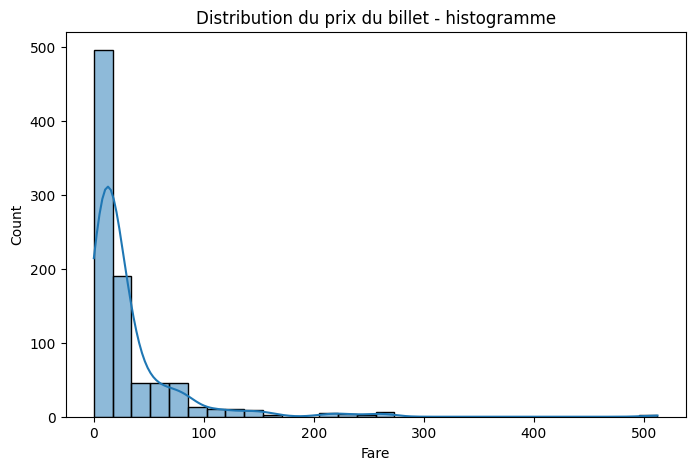

In [17]:
# Histogramme de la variable fare
plt.figure(figsize=(8,5))
sns.histplot(tc_train["Fare"], 
             bins = 30,  # Nombre de sementation
             kde = True) # Affichage de la fréquence par noyau gaussien
plt.title("Distribution du prix du billet - histogramme")

## IV. F. Analyse de la colonne "Embarked"

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
Nombre de passagers par ports d'embarquement :
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: count, dtype: float64


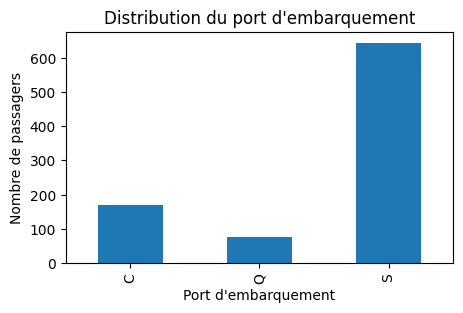

In [18]:
# Analyse descriptive de Embarked
print(tc_train.Embarked.describe())

# Compter le nombre de passagers par port d'embarquement
count_pembark = tc_train['Embarked'].value_counts()
print("Nombre de passagers par ports d'embarquement :")
print(count_pembark, count_pembark/tc_train.shape[0] * 100) #ajouter la prise en compte des Na ? même si il y en a pas comme figure d'exemple

# Histogramme de Embarked
plt.figure(figsize=(5,3))
tc_train['Embarked'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution du port d'embarquement")
plt.ylabel("Nombre de passagers")
plt.xlabel("Port d'embarquement")
plt.show()


# V. Pre-processing

<span style = "color:magenta"> Dans cette partie V, on tente de réaliser un premier traitement des données : smbolisation des chaines de caratères, encodage des variables catégorielles, standardisation des variables numériques, délétion des variables difficelemment gérées par les modèles. L'objectif de cette partie est donc de simplifier les données afin qu'ils puissent être utilisées par les modèles.

## V. A. Modification de la colonne "Cabin" pour ne conserver que le pont

In [19]:
# Extraire la première lettre de chaque cabine
tc_train['Cabin'] = tc_train['Cabin'].str[0]

C:\Users\rapha\AppData\Local\Temp\ipykernel_48092\1701590814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc_train['Cabin'] = tc_train['Cabin'].str[0]


In [20]:
tc_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [21]:
# Calcul des valeurs manquantes et vérification de l'imputation à 5 décimales près
vm_final_preprocess = tc_train.isnull().sum()
vm_propor_final_preprocess = vm_final_preprocess/len(tc_train)

print("Pourcentage de valeurs manquantes par colonnes ", 
      vm_propor_final_preprocess.round(5))

Pourcentage de valeurs manquantes par colonnes  PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64


## V. B. Transformation des variables discrètes en variables continues via encodage OneHot

In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Définition des colonnes
cat_varibales = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Cabin']
num_variables = ['Age', 'Fare']

In [24]:
# Instanciation de l'encodeur
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

# Encodage One-Hot : création d'un tableau contenant les variables catégorielles encodé de type One-Hot
encoded_data = encoder.fit_transform(tc_train[cat_varibales])

# Transformation en DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_varibales), index=tc_train.index)

In [25]:
# Concaténation avec le DataFrame original sans les colonnes à encoder
tc_train_enc = pd.concat([tc_train.drop(cat_varibales, axis=1), encoded_df], axis=1)

In [26]:
tc_train_enc.head(3)

,PassengerId,Survived,Name,Age,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Vérification de l'encodage
tc_train_enc.dtypes

PassengerId      int64
Survived         int64
Name            object
Age            float64
Ticket          object
Fare           float64
Sex_female     float64
Sex_male       float64
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
SibSp_0        float64
SibSp_1        float64
SibSp_2        float64
SibSp_3        float64
SibSp_4        float64
SibSp_5        float64
SibSp_8        float64
Parch_0        float64
Parch_1        float64
Parch_2        float64
Parch_3        float64
Parch_4        float64
Parch_5        float64
Parch_6        float64
Embarked_C     float64
Embarked_Q     float64
Embarked_S     float64
Cabin_A        float64
Cabin_B        float64
Cabin_C        float64
Cabin_D        float64
Cabin_E        float64
Cabin_F        float64
Cabin_G        float64
Cabin_N        float64
Cabin_T        float64
dtype: object

## V. C. Standardisation des données via StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

## V. C. 1. Vérification du types de chaque variable

In [29]:
# Visualisation des types de données
tc_train_enc.dtypes

PassengerId      int64
Survived         int64
Name            object
Age            float64
Ticket          object
Fare           float64
Sex_female     float64
Sex_male       float64
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
SibSp_0        float64
SibSp_1        float64
SibSp_2        float64
SibSp_3        float64
SibSp_4        float64
SibSp_5        float64
SibSp_8        float64
Parch_0        float64
Parch_1        float64
Parch_2        float64
Parch_3        float64
Parch_4        float64
Parch_5        float64
Parch_6        float64
Embarked_C     float64
Embarked_Q     float64
Embarked_S     float64
Cabin_A        float64
Cabin_B        float64
Cabin_C        float64
Cabin_D        float64
Cabin_E        float64
Cabin_F        float64
Cabin_G        float64
Cabin_N        float64
Cabin_T        float64
dtype: object

### V. C. 2. Application de la standardisation aux variables d'age de prix du billet

In [30]:
# Standardisation
scaler = StandardScaler()
num_variables_standardized = scaler.fit_transform(tc_train_enc[num_variables])

In [31]:
# Transformation en df et merge
num_variables_standardized_df = pd.DataFrame(num_variables_standardized, columns=['Age_std', 'Fare_std'], index = tc_train_enc.index)
tc_train_enc_std = pd.concat([tc_train_enc, num_variables_standardized_df], axis = 1)

# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode), index=tc_train.index)

In [32]:
# Visualisation du nouveau jeu de données et de ses dimensions
tc_train_enc_std.head(3)

,PassengerId,Survived,Name,Age,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Age_std,Fare_std
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563674,-0.500240
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669217,0.788947
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.255451,-0.486650


In [33]:
# Vérification de la standardisation
print("Stats sur Age standardisé :")
print(tc_train_enc_std["Age_std"].describe())

print("Stats sur Fare standardisé :")
print(tc_train_enc_std["Fare_std"].describe())

Stats sur Age standardisé :
count    8.890000e+02
mean     2.717486e-16
std      1.000563e+00
min     -2.226536e+00
25%     -5.636741e-01
50%     -1.013399e-01
75%      4.380499e-01
max      3.905556e+00
Name: Age_std, dtype: float64
Stats sur Fare standardisé :
count    8.890000e+02
mean     1.398706e-16
std      1.000563e+00
min     -6.462044e-01
25%     -4.872378e-01
50%     -3.551972e-01
75%     -2.207954e-02
max      9.668551e+00
Name: Fare_std, dtype: float64


In [34]:
# Observation du type de chaque variables
tc_train_enc_std.dtypes

PassengerId      int64
Survived         int64
Name            object
Age            float64
Ticket          object
Fare           float64
Sex_female     float64
Sex_male       float64
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
SibSp_0        float64
SibSp_1        float64
SibSp_2        float64
SibSp_3        float64
SibSp_4        float64
SibSp_5        float64
SibSp_8        float64
Parch_0        float64
Parch_1        float64
Parch_2        float64
Parch_3        float64
Parch_4        float64
Parch_5        float64
Parch_6        float64
Embarked_C     float64
Embarked_Q     float64
Embarked_S     float64
Cabin_A        float64
Cabin_B        float64
Cabin_C        float64
Cabin_D        float64
Cabin_E        float64
Cabin_F        float64
Cabin_G        float64
Cabin_N        float64
Cabin_T        float64
Age_std        float64
Fare_std       float64
dtype: object

## V. D. Délétion des variables peu pertinentes associées à l'indexage des passagers, le nom, le numéro de ticket, et l'age et au prix du billet non standardisé

In [35]:
# Création d'un tableau final pré-traité, duquel on retire les colonnes peu pertinentes
tc_train_fp = tc_train_enc_std.select_dtypes(include = ["number"]).drop(columns=["PassengerId", "Age", "Fare"])

tc_train_fp.head(3)

,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Age_std,Fare_std
0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563674,-0.500240
1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669217,0.788947
2,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.255451,-0.486650


In [36]:
# Vérification que toutes les colonnes soient au format float (sauf "survived") par le traitement par les modèles
for col in tc_train_fp :
        test_bool = tc_train_fp.dtypes[col]
        if test_bool == float :
            continue
        else :
            print("Au moins une colonne est de type différent de float :",
                  col)

Au moins une colonne est de type différent de float : Survived


# VI. Réalisation et expérimentation de premiers modèles

<span style = "color:magenta"> Dans cette partie VI., on se expérimente des premiers modèles, très simple, afin de fournir une première approche à la prédiction et d'observer les performances de chaque modèle. En fonction des résultats, on pourra adapter la suite de l'étude.

<span style = "color:magenta"> Ici, on expérimentera des modèles de type SVM, forêt ou encore de modèle ensembliste simple type forêt aléatoire ou XGBoost.

## VI. A. Import des bibliothèques associées

In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import svm, linear_model, naive_bayes
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import classification_report

## VI. B. Séléction des variables descriptives d'intérêt

### VI. B. 1. Split en ensemble d'apprentissage et de test

In [38]:
# Création d'un df temporaire
tc_num_temp_pm = tc_train_fp

# Création des ensemble d'apprentissage et de test
X_temp_pm = tc_num_temp_pm.iloc[:, 1:]
Y_temp_pm = tc_num_temp_pm["Survived"]

# Vérification des dimensions d'apprentissage et de test
print("Dimension de Xtemp :", X_temp_pm.shape)
print("Dimension de Ytemp :", Y_temp_pm.shape)
# print(Y_temp_pm.head())

Dimension de Xtemp : (889, 33)
Dimension de Ytemp : (889,)


In [39]:
# Splitting
X_train_temp, X_test_temp, Y_train_temp, Y_test_temp = train_test_split(X_temp_pm, Y_temp_pm, test_size=0.33, random_state=0)

# Vérification de la dimension des ensembles d'apprentissage et de test
print(X_train_temp.shape, X_test_temp.shape, Y_train_temp.shape, Y_test_temp.shape)

(595, 33) (294, 33) (595,) (294,)


In [40]:
print("Vérification du tableau de variables :",
      X_train_temp.head(2),
      "Vérification du tableau de cibles :",
      Y_train_temp.head(2))

Vérification du tableau de variables :      Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  SibSp_0  SibSp_1  \
171         0.0       1.0       0.0       0.0       1.0      0.0      0.0   
188         0.0       1.0       0.0       0.0       1.0      0.0      1.0   

     SibSp_2  SibSp_3  SibSp_4  ...  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
171      0.0      0.0      1.0  ...      0.0      0.0      0.0      0.0   
188      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

     Cabin_F  Cabin_G  Cabin_N  Cabin_T   Age_std  Fare_std  
171      0.0      0.0      1.0      0.0 -1.950676 -0.059829  
188      0.0      0.0      1.0      0.0  0.823328 -0.334142  

[2 rows x 33 columns] Vérification du tableau de cibles : 171    0
188    0
Name: Survived, dtype: int64


## VI. C. Premier modèle sans séléction de variables

### VI. C. 1. Modèles de types SVM

In [41]:
# Construction de deux modèles de types SVM linéaire et gaussien
mod_SVMl = svm.SVC(kernel="linear")
mod_SVMg = svm.SVC(gamma = 10)

mod_SVMl.fit(X_train_temp, Y_train_temp)
mod_SVMg.fit(X_train_temp, Y_train_temp)

SVC(gamma=10)

In [42]:
#Prédiction et performance
yhat_mod_SVMl = mod_SVMl.predict(X_test_temp)
yhat_mod_SVMg = mod_SVMg.predict(X_test_temp)

print("perf modèle SVM linéaire ")
print(classification_report(Y_test_temp, yhat_mod_SVMl))
print("perf modèle SVM gaussien ") 
print(classification_report(Y_test_temp, yhat_mod_SVMg))

perf modèle SVM linéaire 
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       174
           1       0.76      0.63      0.69       120

    accuracy                           0.77       294
   macro avg       0.77      0.75      0.75       294
weighted avg       0.77      0.77      0.76       294

perf modèle SVM gaussien 
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       174
           1       0.62      0.73      0.67       120

    accuracy                           0.71       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.72      0.71      0.71       294



<span style = "color:magenta"> On utilise dans cette première sous parties un modèle de type SVM, qui fonctionne par maximisation de marge entre un hyperplan généré et les données des deux classes (ou plus) d'entrainement. <br>
En observant le résumé des perfomances du modèles, on peut porter notre attention sur le score f1, qui a l'avantage de combiné la précision et le rappel dans un problème de classification relativement déséquilibré. <br>
On observe que les performances du modèle de classification SVM sont meilleurs en considérant que les données sont séparables linéairement (les perfomances en projetant les données non linéairement par noyeau gaussien sont plus faibles). Les données serait donc déjà séparable linéairement dans notre espace d'entrée. Cet aspect est à garder en mémoire pour la suite de l'étude.

### VI. C. 1. Modèles de types Forêts

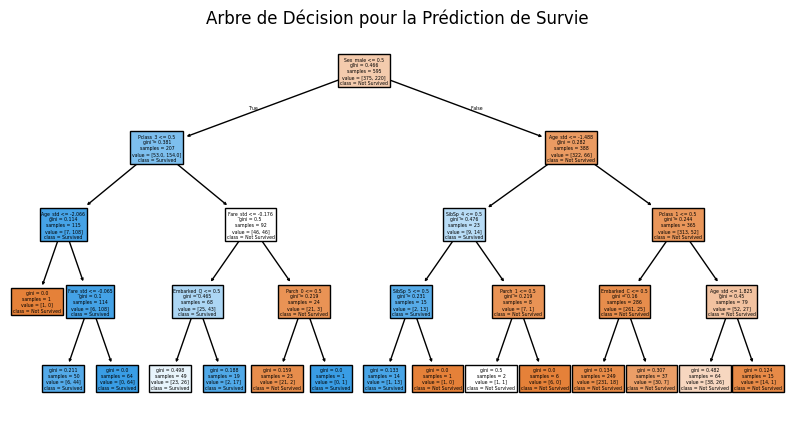

In [43]:
#Construction et entrainement du modèle
clf_f = tree.DecisionTreeClassifier(max_depth = 4)
clf_f = clf_f.fit(X_train_temp, Y_train_temp)
mod_f = clf_f

# Dessin de l'algorithme de décision
plt.figure(figsize=(10, 5))  
tree.plot_tree(mod_f, filled=True, feature_names=X_train_temp.columns, class_names=['Not Survived', 'Survived'])
plt.title("Arbre de Décision pour la Prédiction de Survie")
plt.show()  # Afficher l'arbre

In [44]:
# Prédiction et performance
yhat_clf_rf = mod_f.predict(X_test_temp )

print("perf modèle de Forest ", classification_report(Y_test_temp, yhat_clf_rf))

perf modèle de Forest                precision    recall  f1-score   support

           0       0.79      0.84      0.82       174
           1       0.75      0.68      0.71       120

    accuracy                           0.78       294
   macro avg       0.77      0.76      0.76       294
weighted avg       0.77      0.78      0.77       294



<span style = "color:magenta"> On observe grâce à ce modèle d'arbre, fonctionnant par réduction d'entropie, de meilleurs performances que sur les modèles de types SVMs. Le score f1 est légérement plus élevés. On remarque également que le score f1 est plus élevé pour la valeur 0 que pour la valeur 1 de "Survived". C'est un résultat auquel nous pouvions nous attendre. En effet, il y a davantage de valeurs égale à 0 dans la classe "Survived" que de valeurs égales à 1. Un classifieur, quelque soit son biais, aura plus de chance de bien prédire la classe 0 par rapport à la classe 1, cette dernière étant en plus grande proportions.

<span style = "color:magenta"> On retient dans cette partie que l'approche par réduction de d'entropie (type arbre de décision) semble mieux fonctionnée que par maximisation de marge (modèle de type SVM). Les arbres de décisions ont également la propriété d'avoir une bonne gestion de la non linéarité. 

### VI. C. 3. Modèles ensemblistes

<span style = "color:magenta"> Dans cette partie, on tente une approche plus complexe par des modèles ensemblistes, de type RandomForest ou XGBoost. Ces modèles, contrairement aux précédents, génère plus modèles à partir d'un boostraping (tirage aléaoire avec retour) des données, puis prédisent une classe à partir des instances données. Puis un modèle agrégé est obtenu de la combinaison de tous les modèles générés à partir d'un vote majoritaire. Ces méthodes ont l'avantage, par bagging (boostraping et aggrégation), de réduire la probabilité de sur-appentissage.

#### VI. C. 1. a. Modèle de type forêts randomisée

<span style = "color:magenta"> Ici, les modèles générés à partir du bagging des données sont des arbres

In [45]:
# Construction de modèle
mod_rf =  RandomForestClassifier()
mod_rf.fit(X_train_temp, Y_train_temp)

# Evaluation quantitative
yhat_rf = mod_rf.predict(X_test_temp)
print("perf modèle RFC")
print(classification_report(Y_test_temp, yhat_rf))

perf modèle RFC
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       174
           1       0.75      0.68      0.71       120

    accuracy                           0.78       294
   macro avg       0.77      0.76      0.76       294
weighted avg       0.77      0.78      0.77       294



#### VI. C. 1. Modèles de type XGBoost

<span style = "color:magenta"> On utilise ici un modèle ensembliste de type XGBoost, qui se base aussi sur la construction d'arbres de décisions. Contrairement aux forêts aléatoires, la construction d'arbre et séquentielle et corrige les erreurs. XGBoost est légérement plus perfomant que les forêts aléatoires.

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# Construction du modèle
st = xgb.XGBClassifier().fit(X_train_temp, Y_train_temp) # pour passer par l'interface sklearn
mod_XGBst = st

# Evaluation quantitative
yhat_XGBst = mod_XGBst.predict(X_test_temp)

print("perf modèle XGB")
print(classification_report(Y_test_temp, yhat_XGBst))

perf modèle XGB
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       174
           1       0.74      0.69      0.72       120

    accuracy                           0.78       294
   macro avg       0.77      0.76      0.77       294
weighted avg       0.77      0.78      0.77       294



<span style = "color:magenta"> Dans cette partie, on observe que les modèles ensemblistes offre de meilleurs résultats, nottament XGBoost. Ce modèle pourra être privilégiée dans la suite.

<span style = "color:magenta"> **Conclusion partie VI. :** Ainsi, dans cette partie, encore exploratoire, nous permet d'avoir un premier aperçu des performances des différents type de modèles.

<span style = "color:magenta">  Il semblerait que les données soient linéairement séparables dans leur espace d'entrée, et que les méthode ensembliste (bagging) aient d'excellente performances.

# VII. Séléction de caractéristiques : ingénierie des variables

<span style = "color:magenta"> L'objectif de cette partie VII. est de pouvoir séléctionner les caractéristiques efficientes pour la classification. En réduisant la dimension de l'espace de départ, on diminue le bruit et le risque de sur-apprentissage.

## VII. A. Séléction des variables numériques

In [48]:
# Création d'un df temporaire
tc_train_fp_FE = tc_train_fp

# Création des ensemble d'apprentissage et de test
X_tempFE = tc_train_fp_FE.iloc[:,1:]
Y_tempFE = tc_train_fp_FE["Survived"]

print(X_tempFE.shape)
print(Y_tempFE.shape)

(889, 33)
(889,)


In [49]:
# Création de l'ensemble d'apprentissage et de test pour la séléction de variables
X_train_FE, X_test_FE, Y_train_FE, Y_test_FE = train_test_split(X_tempFE, Y_tempFE, test_size=0.33, random_state=0)

In [50]:
# Vérication des dimension d'apprentissage et de test
print("Dimension de l'espace des variables d'appretissage :", X_train_FE.shape,
      "Dimension de l'espace d'entrée des variables de test :", X_test_FE.shape)

Dimension de l'espace des variables d'appretissage : (595, 33) Dimension de l'espace d'entrée des variables de test : (294, 33)


## VII. B. Observation des corrélations avec la survie

<span style = "color:magenta"> Dans cette partie, on propose une analyse simple de la corrélation entre la variables survie et les variables descriptives.

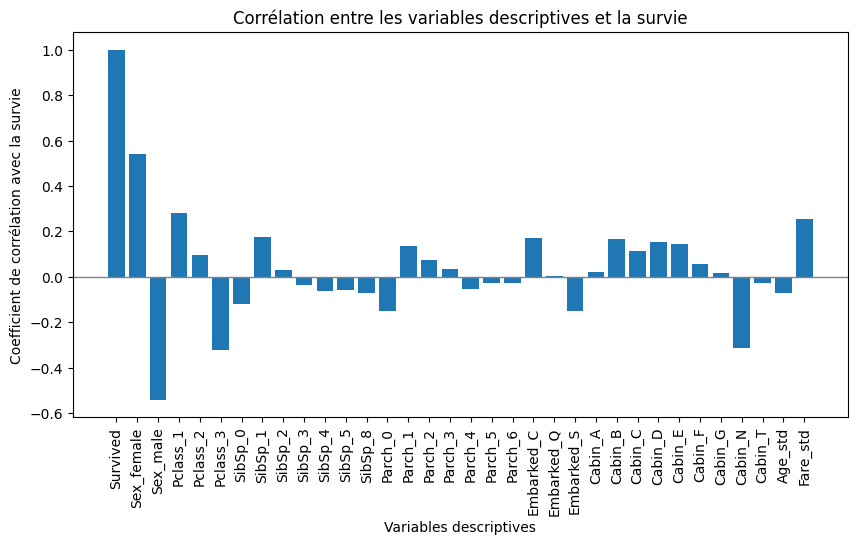

In [51]:
# Calcul de corrélation entre les variables descriptives et la survie
corr = tc_train_fp.corr()['Survived']

# Histogramme de corrélation
plt.figure(figsize=(10, 5))  # Ajuste la taille de la figure si nécessaire
plt.bar(corr.index, corr.values)  # Utilise les noms des colonnes comme étiquettes
plt.xlabel("Variables descriptives")
plt.ylabel("Coefficient de corrélation avec la survie")
plt.title("Corrélation entre les variables descriptives et la survie")
plt.xticks(rotation = 90) 
plt.axhline(0, color='gray', lw=1)  # Ligne horizontale à y=0 pour référence
plt.show()


<span style = "color:magenta"> Première analyse :
- <span style = "color:magenta"> certaines variables semblent très corrélées à la survie :
    - <span style = "color:magenta"> positivement : "sex_female", "pclass_1", "Fare_std"
    - <span style = "color:magenta"> négativement : "sex_male", "pclass_3", "Cabin_N"
- <span style = "color:magenta"> ou non correlées : de nombreux parents/conjoint.e à bord


## VII. C. Séléction de variables par méthode wrapper : SFS

<span style = "color:magenta">  Pour réaliser une séléction de variables, on procède d'abord par méthode wrapper : utilisation d'un modèle et d'une métrique, et on optimise la métrique par le modèle en ajustant les variables séléctionnées.

### VII. C. 1. Import des bibliothèques associées

In [52]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

### VII. C. 2. Réalisation du SFS

<span style = "color:magenta"> On utilise ici un modèle de forêt simple, perfomant comme on l'a vu, et d'une complexité modérée en temps et calcul pour des résultats rapides.

In [53]:
# Création d'un sélecteur de caractéristiques séquentiel avec F1 score comme métrique
sfs = SequentialFeatureSelector(
    mod_f,
    n_features_to_select='auto',  # Nombre de caractéristiques à sélectionner
    direction='forward',  # Direction de sélection : plus rapide
    scoring=make_scorer(f1_score),  # Utilisation du F1 score pour allier précision et rappel dans un modèle desquilibré
    cv = 5  # Validation croisée à 5 plis
)

# Ajuster le sélecteur sur l'ensemble d'apprentissage
sfs.fit(X_train_FE, Y_train_FE)

# Récupérer les caractéristiques sélectionnées
selected_features = X_train_FE.columns[sfs.get_support()]
print("Variables sélectionnées:", selected_features)

# Évaluer le modèle sur les données de test avec les caractéristiques sélectionnées
X_train_selected = sfs.transform(X_train_FE)
X_test_selected = sfs.transform(X_test_FE)

mod_f.fit(X_train_selected, Y_train_FE)
y_pred_mod_mod_f = mod_f.predict(X_test_selected)

# Calculer le F1 score sur l'ensemble de test
f1 = f1_score(Y_test_FE, y_pred_mod_mod_f)
print("F1 Score sur l'ensemble de test avec caractéristiques sélectionnées:", f1)

Variables sélectionnées: Index(['Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_8', 'Parch_3', 'Parch_4', 'Parch_6', 'Cabin_C', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Age_std'],
      dtype='object')
F1 Score sur l'ensemble de test avec caractéristiques sélectionnées: 0.7304347826086957


### Comparaison d'un modèle prenant toutes les variables et celles séléctionnées par le sfs

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
# Modèle sur les caractéristiques sélectionnées
mod_f.fit(X_train_selected, Y_train_FE)
y_pred_selected = mod_f.predict(X_test_selected)
accuracy_selected = accuracy_score(Y_test_FE, y_pred_selected)
f1_selected = f1_score(Y_test_FE, y_pred_selected)

print("Performance avec caractéristiques sélectionnées :")
print("Accuracy:", accuracy_selected)
print("F1-Score:", f1_selected)

# Modèle sur toutes les caractéristiques
mod_f.fit(X_train_FE, Y_train_FE)
y_pred_all = mod_f.predict(X_test_FE)
accuracy_all = accuracy_score(Y_test_FE, y_pred_all)
f1_all = f1_score(Y_test_FE, y_pred_all)

print("\nPerformance avec toutes les caractéristiques :")
print("Accuracy:", accuracy_all)
print("F1-Score:", f1_all)

Performance avec caractéristiques sélectionnées :
Accuracy: 0.7891156462585034
F1-Score: 0.7304347826086957

Performance avec toutes les caractéristiques :
Accuracy: 0.7721088435374149
F1-Score: 0.7074235807860262


<span style = "color:magenta"> On observe que la réduction de dimension est efficace : bien que le gain sur les métriques soient faibles, il est significatif.

## VII. D. Séléction par méthode de projection : PCA

<span style = "color:magenta"> Dans cette partie, on tente une autre technique de réduction de dimension par analyse en composantes principales, PCA. En projetant les composantes principales, de dimension réduite par rapport à la dimension initale, on décrit un nouvel espace des données qui permet de décrire les données dans un espace de dimension réduit.

### VII. D. 1. Import des bibliothèques

In [56]:
from sklearn.decomposition import PCA

### VII. D. 2. Tentative à deux composantes conservées

<span style = "color:magenta">  Afin d'avoir une représentation graphique d'abord, on ne conserve initallement que deux composantes.

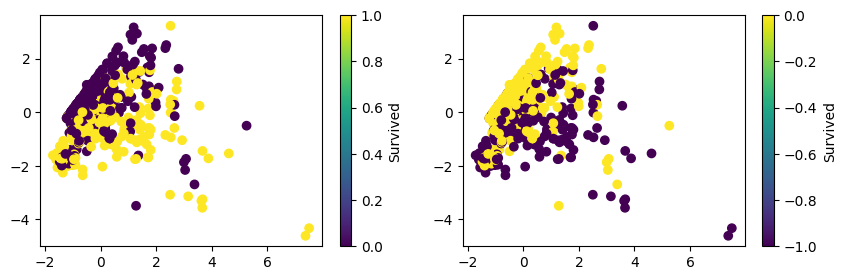

In [57]:
pca2 = PCA(n_components = 2)
X_train_FE_p2 = pca2.fit_transform(X_train_FE)

# X_train_FE_p2.shape

plt.figure(figsize = (10,3), facecolor = "white")
plt.subplot(1,2,1)
scatter21 = plt.scatter(X_train_FE_p2[:,0], X_train_FE_p2[:,1], c = +Y_train_FE)
plt.subplot(1,2,2)
scatter22 = plt.scatter(X_train_FE_p2[:,0], X_train_FE_p2[:,1], c = -Y_train_FE)
plt.colorbar(scatter21, label="Survived")
plt.colorbar(scatter22, label="Survived")

<span style = "color:magenta"> Representation peu effficace, on ne sépare pas les données de survie par les deux composantes.

### VII. D. 2. Tentative à n composantes conservées

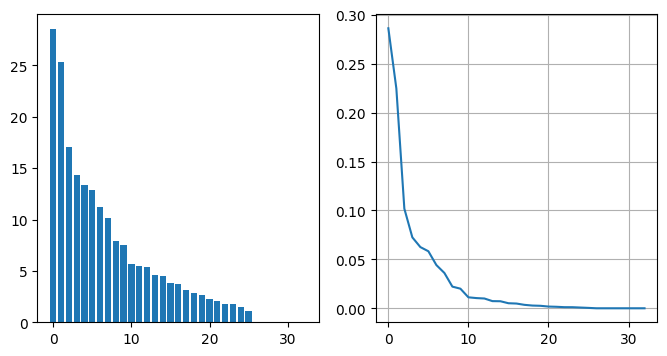

In [58]:
pca_n = PCA()
pca_n.fit(X_train_FE)  # calcul des valeurs propres, vecteurs propres

# Analyse des valeurs propres:
plt.figure(facecolor='white', figsize=[8,4])
plt.subplot(1,2,1)
plt.bar(np.arange(X_train_FE.shape[1]), pca_n.singular_values_)
plt.subplot(1,2,2)
plt.plot(pca_n.explained_variance_ratio_)
plt.grid()
plt.show()

<span style = "color:magenta"> Pas de palier franc dans la réduction de la variance expliquée, difficile de déterminer un nombre minimum de composantes principales à prendre en compte.

### VII. D. 3. Evolution de la performance avec l'ajout des dimensions

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Nombre de dimension optimal : 3
f1 score pour dimnesion optimale de la liste test : 0.683982683982684


<Figure size 640x480 with 0 Axes>

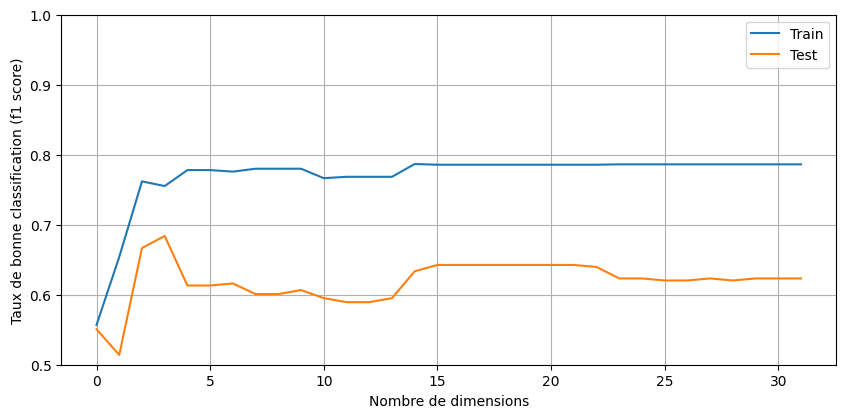

In [60]:
Xnew = pca_n.transform(X_train_FE) # projection sur tous les axes
# print("Xnew :", Xnew)
XnewT = pca_n.transform(X_test_FE) # projection sur tous les axes
# print("XnewT :", XnewT)

Acc_train = []
Acc_test = []

for i in range(1,Xnew.shape[1]) :
    Xnew_temp = Xnew[:,0:i]
    XnewT_temp = XnewT[:,0:i]
    
    mod_f.fit(Xnew_temp, Y_train_FE) # Utilisation d'un arbre de décision
    
    Acc_train.append(f1_score(mod_f.predict(Xnew_temp), Y_train_FE))
    Acc_test.append(f1_score(mod_f.predict(XnewT_temp), Y_test_FE))

# Détermination du nombre de dimension optimal avant sur-apprentissage
print("Nombre de dimension optimal :", Acc_test.index(max(Acc_test)))
print("f1 score pour dimnesion optimale de la liste test :", max(Acc_test))

# Visualisation des performances
plt.figure(facecolor='white')
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(Acc_train)
plt.plot(Acc_test)
plt.grid()
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de bonne classification (f1 score)")  # Correction de l'axe des ordonnées
plt.ylim(0.5, 1)

plt.legend(['Train', 'Test'])
plt.show()

Nombre de dimension optimal : 5
f1 score pour dimnesion optimale de la liste test : 0.6854838709677419


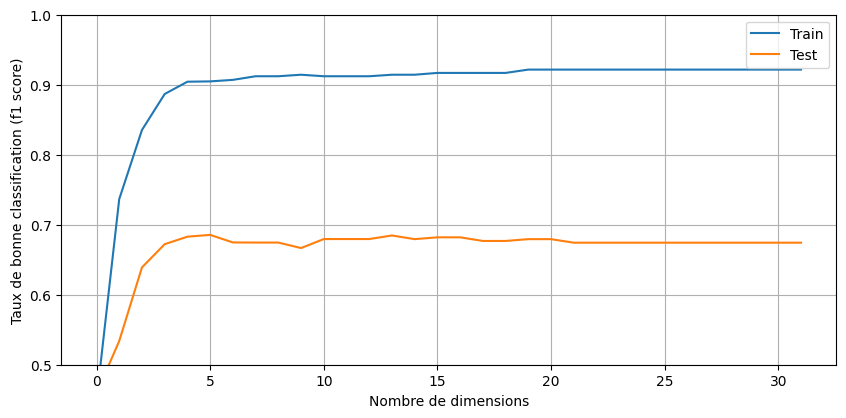

In [61]:
Xnew = pca_n.transform(X_train_FE) # projection sur tous les axes
# print("Xnew :", Xnew)
XnewT = pca_n.transform(X_test_FE) # projection sur tous les axes
# print("XnewT :", XnewT)

Acc_train_g = []
Acc_test_g = []

for i in range(1,Xnew.shape[1]) :
    Xnew_temp = Xnew[:,0:i]
    XnewT_temp = XnewT[:,0:i]
    
    mod_SVMg.fit(Xnew_temp, Y_train_FE)
    
    Acc_train_g.append(f1_score(mod_SVMg.predict(Xnew_temp), Y_train_FE))
    Acc_test_g.append(f1_score(mod_SVMg.predict(XnewT_temp), Y_test_FE))
    
# Détermination du nombre de dimension optimal avant sur-apprentissage
print("Nombre de dimension optimal :", Acc_test_g.index(max(Acc_test_g)))
print("f1 score pour dimnesion optimale de la liste test :", max(Acc_test_g))

# Visualisation des performances
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(Acc_train_g)
plt.plot(Acc_test_g)
plt.grid()
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de bonne classification (f1 score)")  # Correction de l'axe des ordonnées
plt.ylim(0.5, 1)
plt.legend(['Train', 'Test'])

plt.show()

<span style = "color:magenta"> On observe bien avec ces expériences le sur-apprentissage sur nos données. QUe ce soit avec un modèle de forêt ou un modèle gaussien, la performance en train est croissante, contrairement à la perfomance en test, qui diminue à un certain nombre de dimension, ici composantes principales, ajoutées.

### VII. D. 4. Projection non linéaire : t-SNE

<span style = "color:magenta"> On tente une réduction de dimension par méthode t-SNE qui contrairement à la PCA, est projète non linéairement les données et est donc capable de capture des données plus complexes.

In [62]:
from sklearn.manifold import TSNE

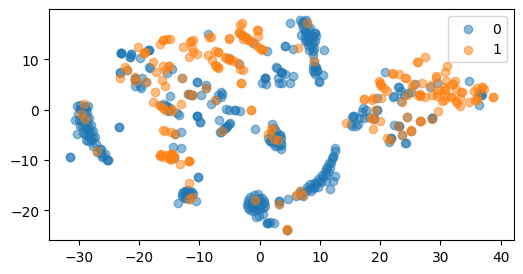

In [63]:
X_train_FE_SNE = X_train_FE
Y_train_FE_SNE = Y_train_FE

visu = TSNE()
x2d = visu.fit_transform(X_train_FE_SNE)

plt.figure(facecolor="white", figsize = (6,3))
for y in np.unique(Y_train_FE_SNE):
    plt.scatter(x2d[Y_train_FE_SNE==y,0], x2d[Y_train_FE_SNE==y,1], alpha=0.5)
plt.legend(np.arange(10))

<span style = "color:magenta"> On a projeté sur les deux premières dimensions des composantes principales identifiées par la méthode t-SNE? qui à nouveau est peu concluante pour bien séparer les données. Pour la suite, dûe à la complexité de t-sne, on n'utilisera pas t-sne.

### VII. D. 5. Fléau de la dimmensionnalité ?

In [64]:
from sklearn.preprocessing import MinMaxScaler

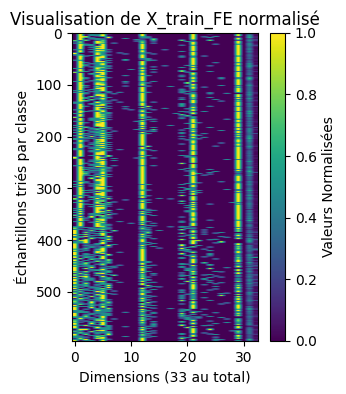

In [65]:
# Matrice des distances pour toutes les colonnes non triées selon l'information

# Normaliser chaque colonne de X_train_FE
scalertest = MinMaxScaler()
X_train_FE_scaled = scalertest.fit_transform(X_train_FE)

# Trier les données pour que les échantillons de la même classe soient regroupés
ind = np.argsort(Y_train_FE)

# Affichage
plt.figure(figsize=(3, 4))
plt.imshow(X_train_FE_scaled[ind], aspect='auto', cmap='viridis')
plt.colorbar(label="Valeurs Normalisées")
plt.xlabel("Dimensions (33 au total)")
plt.ylabel("Échantillons triés par classe")
plt.title("Visualisation de X_train_FE normalisé")
plt.show()


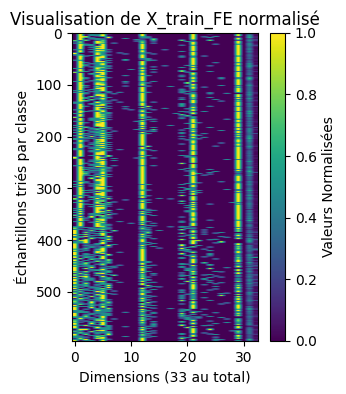

In [66]:
# Matrice des distances pour toutes les colonnes non triées selon la pca

# Normaliser chaque colonne de X_train_FE
scalertest = MinMaxScaler()
Xnew_scaled = scalertest.fit_transform(Xnew)

# Trier les données pour que les échantillons de la même classe soient regroupés
ind = np.argsort(Y_train_FE)

# Affichage
plt.figure(figsize=(3, 4))
plt.imshow(X_train_FE_scaled[ind], aspect='auto', cmap='viridis')
plt.colorbar(label="Valeurs Normalisées")
plt.xlabel("Dimensions (33 au total)")
plt.ylabel("Échantillons triés par classe")
plt.title("Visualisation de X_train_FE normalisé")
plt.show()


#### VII. D. 5. i) Expérience d'ajout de dimension

<span style = "color:magenta"> On fait la même expérience que précedemment, mais cette fois on ajoute les features originelles du jeu de données.

Nombre de dimension optimal : 7
f1 score pour dimnesion optimale de la liste test : 0.6877828054298643


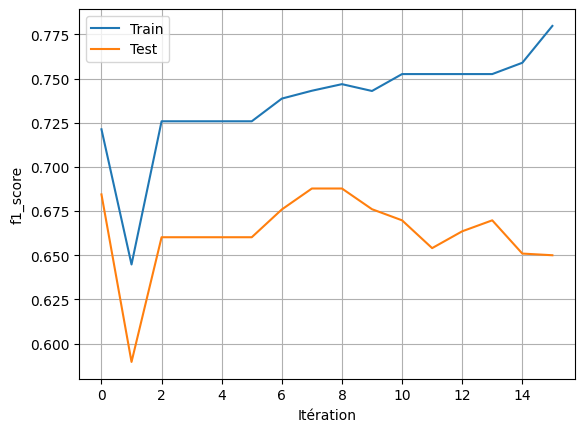

In [67]:
# Variables pour stocker les performances
perf_train = []
perf_test = []

# On commence par les données de base et on ajoute progressivement les autres dimension
for ndim in range(2, X_train_FE.shape[1] + 1, 2): 
    X_train_temp_expdimen = X_train_FE.iloc[:, 0:ndim]  # Réduction des dimensions pour l'entraînement
    X_test_temp_expdim = X_test_FE.iloc[:, 0:ndim]      # Réduction des dimensions pour le test
    
    mod_f.fit(X_train_temp_expdimen, Y_train_FE) # Utilisation d'un arbre de décision
    
    perf_train.append(f1_score(Y_train_FE, mod_f.predict(X_train_temp_expdimen)))  
    perf_test.append(f1_score(Y_test_FE, mod_f.predict(X_test_temp_expdim)))

# Détermination du nombre de dimension optimal avant sur-apprentissage
print("Nombre de dimension optimal :", perf_test.index(max(perf_test)))
print("f1 score pour dimnesion optimale de la liste test :", max(perf_test))

# Visualisation des performances
plt.figure(facecolor='white')
plt.plot(perf_train, label="Train")
plt.plot(perf_test, label="Test")
plt.grid()
plt.xlabel("Itération")
plt.ylabel("f1_score")  # Correction de l'axe des ordonnées
plt.legend()
plt.show()


Nombre de dimension optimal : 0
f1 score pour dimnesion optimale de la liste test : 0.6844444444444444


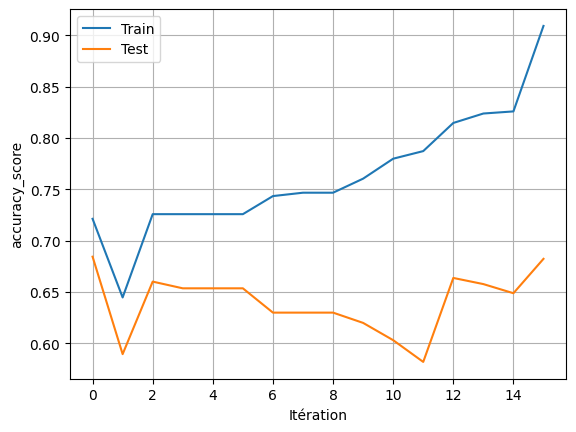

In [68]:
# Initialisation du classifieur SVM linéaire
mod_SVMg = svm.SVC(gamma = 10)

# Variables pour stocker les performances
perf_train = []
perf_test = []

# On commence par les données de base et on ajoute progressivement du bruit
for ndim in range(2, X_train_FE.shape[1] + 1, 2):  # Ajout des dimensions de bruit 4 par 4
    # 1. Extraction des données temporaires
    X_train_temp_expdimen = X_train_FE.iloc[:, 0:ndim]  # Réduction des dimensions pour l'entraînement
    X_test_temp_expdim = X_test_FE.iloc[:, 0:ndim]      # Réduction des dimensions pour le test
    
    # 2. Apprentissage du modèle
    mod_SVMg.fit(X_train_temp_expdimen, Y_train_FE)
    
    # 3. Évaluation et stockage (pour le tracé de la courbe)
    perf_train.append(f1_score(Y_train_FE, mod_SVMg.predict(X_train_temp_expdimen)))  # Performance sur les données d'entraînement
    perf_test.append(f1_score(Y_test_FE, mod_SVMg.predict(X_test_temp_expdim)))      # Performance sur les données de test

# Détermination du nombre de dimension optimal avant sur-apprentissage
print("Nombre de dimension optimal :", perf_test.index(max(perf_test)))
print("f1 score pour dimnesion optimale de la liste test :", max(perf_test))

# Visualisation des performances
plt.figure(facecolor='white')
plt.plot(perf_train, label="Train")
plt.plot(perf_test, label="Test")
plt.grid()
plt.xlabel("Itération")
plt.ylabel("accuracy_score")  # Correction de l'axe des ordonnées
plt.legend()
plt.show()


<span style = "color:magenta"> On observe la différence dans le nombre de dimension nécessaire pour des prédictions similaires, quand elles sont séléctionnées par PCA en fonction de la variance qu'elles décrivent, ou seulement par ajout successifs.

# VIII. Tentative d'optimisation

<span style = "color:magenta"> Dans cette partie, on tente d'optimiser par deux méthodes les hyper-paramètres du modèle XGBoost qui avait montré les meilleurs performances dans une première approche. Cette optimisation compare les performances par boostrapping des données d'entrainement via une validation croisée.

In [70]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

## VIII. A. Import des bibliothèques

In [71]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

## VIII. B. Optimisation par GridSearch

In [72]:
# Définir le modèle XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Définir la grille d'hyperparamètres à explorer
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

# Configuration du GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),  # Par exemple, le F1-score
    cv=5,  # Validation croisée à 5 plis
    n_jobs=-1  # Utilisation de tous les cœurs disponibles pour accélérer
)

# Ajustement sur l'ensemble d'entraînement
grid_search.fit(X_train_selected, Y_train_FE)

# Récupérer le meilleur modèle et le score associé
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleur score de validation croisée (F1-Score) :", best_score)

Meilleurs paramètres trouvés : {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Meilleur score de validation croisée (F1-Score) : 0.7594400205187734


c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       174
           1       0.74      0.68      0.71       120

    accuracy                           0.77       294
   macro avg       0.77      0.76      0.76       294
weighted avg       0.77      0.77      0.77       294



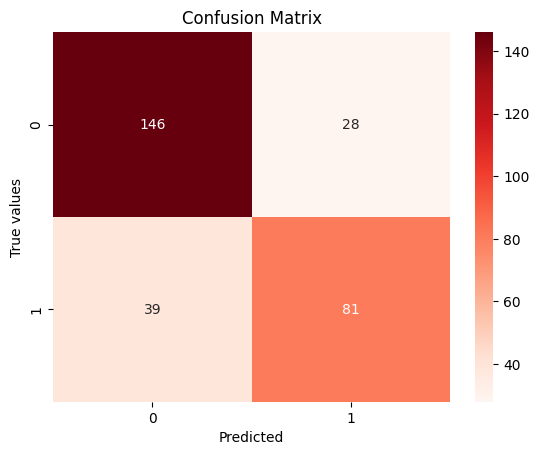

In [73]:
# Rapport du modèle
print(classification_report(Y_test_FE, y_pred_all))

# Matrice de confusion
cm = confusion_matrix(Y_test_FE, y_pred_all)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.show()

## VIII. C. Optimisation par Optuna

In [74]:
import optuna

c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [75]:
# Fonction d'objectif pour Optuna
def objective(trial):
    # Définition de l'espace des hyperparamètres
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'eval_metric': 'logloss'
    }

    # Initialisation du modèle XGBoost avec les paramètres du trial
    xgb_model = XGBClassifier(**param)

    # Évaluation du modèle avec une validation croisée
    # Utiliser le F1-score comme métrique d'évaluation
    scores = cross_val_score(xgb_model, X_train_FE, Y_train_FE, cv=5, scoring='f1')
    
    # Retourner la moyenne des scores pour que Optuna la minimise
    return scores.mean()

# Créer une étude et optimiser
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Affichage des meilleurs paramètres et du meilleur score
best_params = study.best_params
best_score = study.best_value

print("Meilleurs paramètres trouvés par Optuna :", best_params)
print("Meilleur score de validation croisée (F1-Score) :", best_score)

[I 2024-11-18 21:12:47,872] A new study created in memory with name: no-name-eec37ab4-5e69-4fd7-a2af-a310203608d7
C:\Users\rapha\AppData\Local\Temp\ipykernel_48092\4252194340.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
[I 2024-11-18 21:12:48,432] Trial 0 finished with value: 0.7658141344365383 and parameters: {'n_estimators': 149, 'learning_rate': 0.12608263072560666, 'max_depth': 3, 'gamma': 0.008925834730991233}. Best is trial 0 with value: 0.7658141344365383.
C:\Users\rapha\AppData\Local\Temp\ipykernel_48092\4252194340.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': tr

Meilleurs paramètres trouvés par Optuna : {'n_estimators': 96, 'learning_rate': 0.2928089380511545, 'max_depth': 5, 'gamma': 0.471098161821965}
Meilleur score de validation croisée (F1-Score) : 0.7812773233346777


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       174
           1       0.74      0.68      0.71       120

    accuracy                           0.77       294
   macro avg       0.77      0.76      0.76       294
weighted avg       0.77      0.77      0.77       294



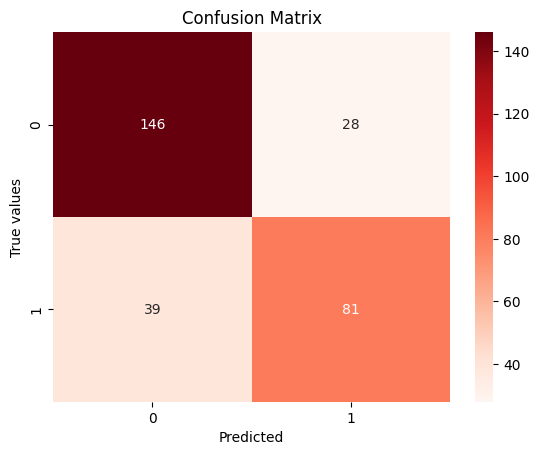

In [76]:
# Rapport du modèle
print(classification_report(Y_test_FE, y_pred_all))

# Matrice de confusion
cm = confusion_matrix(Y_test_FE, y_pred_all)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.show()

# IV. Optimisation des modèles par régularisation

<span style = "color:magenta"> Dans cette partie IX., on tente une autre approche de séléction de variables par la régularisation. Cette méthode, contrairement à la méthode wrapper type SFS, ou Embedded commme produisent les arbres de décisions (ensemblistes ou non), procède de manière précédente. La régularisation ajoute une pénalité à la fonction de coût, qui dépend de l'influence des coefficients : nombre ou impact sur le modèle. Cette pénalité est proportionnelle aux coefficients et donc a tendance à réduire leur influence dans le modèle utilisé.

## IX. A. Optimisation par Ridge Régulazirzation (L2) : ajout d'une pénalité proportionnelle au carré du nombre de coefficient

In [77]:
from sklearn.linear_model import RidgeClassifier

<span style = "color:magenta"> On commence par un coefficient de régularisation égale à 2.

In [151]:
mod_RCexp = RidgeClassifier(alpha=2) # paramètre de régularisation
mod_RCexp.fit(X_train_FE,Y_train_FE)

print("f1_score  en apprentissage :", f1_score(Y_train_FE, mod_RCexp.predict(X_train_FE)))
print("f1_score  en test :", f1_score(Y_test_FE, mod_RCexp.predict(X_test_FE)))
print("Vérification du nombre de dimension de X_train_FE :", X_train_FE.shape[1])

f1_score  en apprentissage : 0.7684964200477327
f1_score  en test : 0.7085201793721974
Vérification du nombre de dimension de X_train_FE : 33


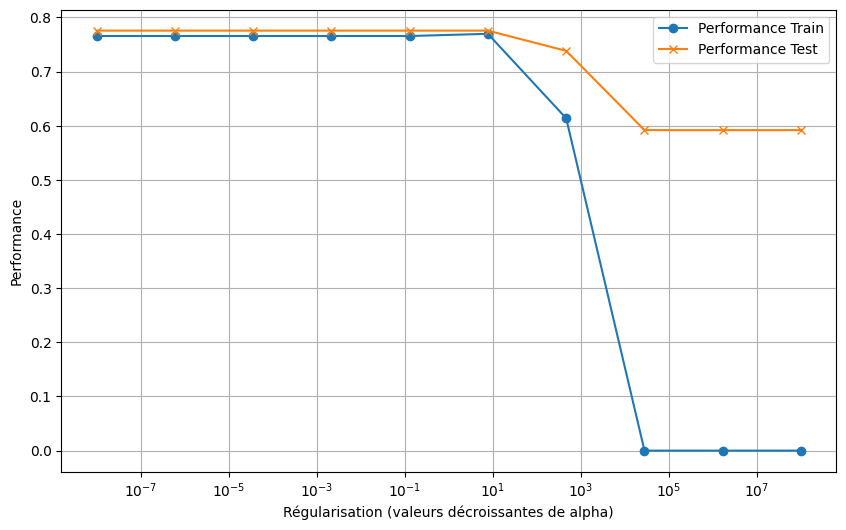

In [168]:
# Différentes valeurs du paramètre de régularisation
alpha_values = np.logspace(-8, 8, 10)  # Valeurs entre 10^-4 et 10^2 (10 points)

p_a = []  # performances en apprentissage
p_t = []  # performances en test

for alpha in alpha_values:  # boucle de test de régularisation
    # Définition et entraînement du modèle
    mod_regL2 = RidgeClassifier(alpha=alpha)
    mod_regL2.fit(X_train_FE, Y_train_FE)
    
    # Évaluation des performances
    p_a.append(f1_score(Y_train_FE, mod_regL2.predict(X_train_FE)))
    p_t.append(accuracy_score(Y_test_FE, mod_regL2.predict(X_test_FE)))

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, p_a, label="Performance Train", marker='o')
plt.plot(alpha_values, p_t, label="Performance Test", marker='x')
plt.xscale('log')  # échelle logarithmique pour l’axe des x
plt.grid()
plt.xlabel('Régularisation (valeurs décroissantes de alpha)')
plt.ylabel('Performance')
plt.legend()
plt.gcf().set_facecolor('white')
plt.show()


## IX. B. Optimisation par régularisation LASSO (L1) : ajout à la fonction de coût d'une pénalité proportionnelle à la somme des valeurs absolules des coefficients du modèle

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.405e+00, tolerance: 1.387e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.406e+00, tolerance: 1.387e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

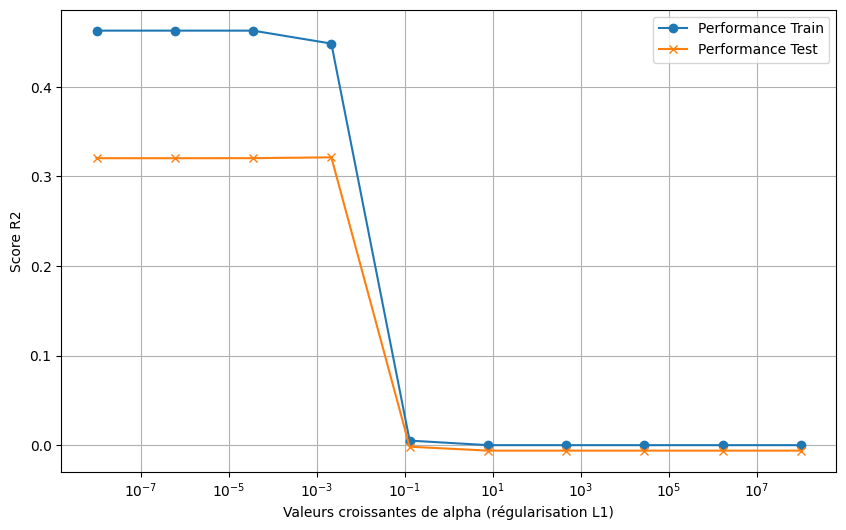

In [82]:
# Différentes valeurs du paramètre de régularisation (alpha pour Lasso)
alpha_values = np.logspace(-8, 8, 10)  # Valeurs entre 10^-4 et 10^2 (10 points)

p_a = []  # performances en apprentissage
p_t = []  # performances en test

for alpha in alpha_values:  # boucle de test de régularisation
    # Définition et entraînement du modèle avec régularisation L1 (Lasso)
    mod_regL1 = Lasso(alpha=alpha)  # Lasso utilise alpha pour la régularisation
    mod_regL1.fit(X_train_FE, Y_train_FE)
    
    # Évaluation des performances
    p_a.append(mod_regL1.score(X_train_FE, Y_train_FE))  # score R2 en apprentissage
    p_t.append(mod_regL1.score(X_test_FE, Y_test_FE))    # score R2 en test

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, p_a, label="Performance Train", marker='o')
plt.plot(alpha_values, p_t, label="Performance Test", marker='x')
plt.xscale('log')  # échelle logarithmique pour l’axe des x
plt.grid()
plt.xlabel('Valeurs croissantes de alpha (régularisation L1)')
plt.ylabel('Score R2')
plt.legend()
plt.gcf().set_facecolor('white')
plt.show()

## IX. C. Optimisation par régularisation ElasticNet : combinaison de L1 (séléction de caractéristique) et L2 (réduction de l'influence des variables non pertinentes)

In [83]:
from sklearn.linear_model import ElasticNet

c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+01, tolerance: 1.387e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+01, tolerance: 1.387e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

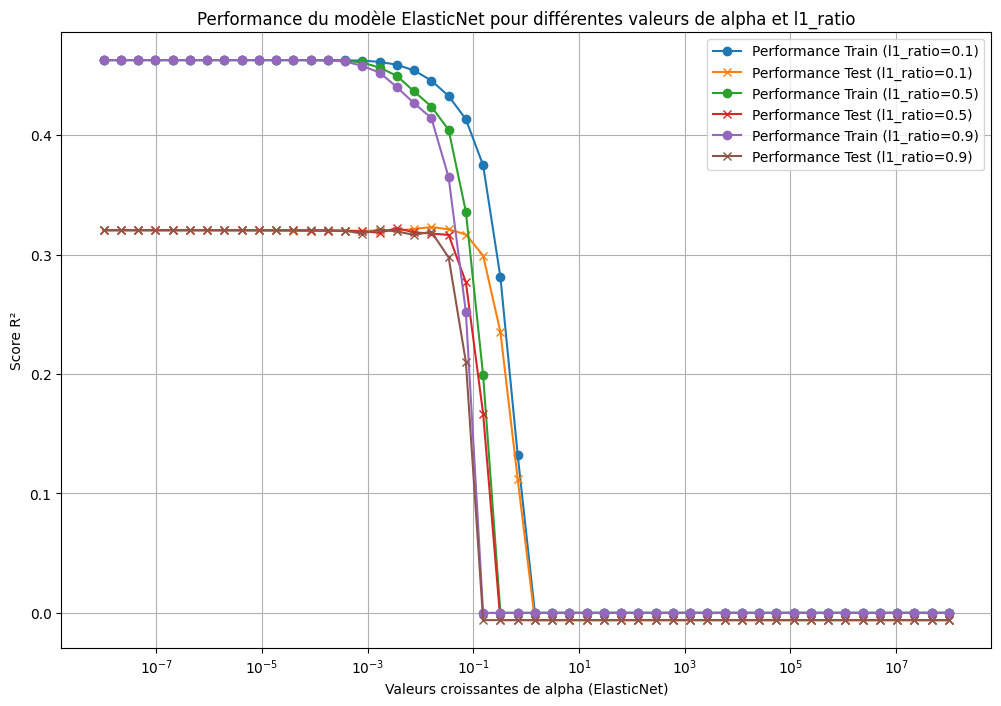

In [85]:
# Différentes valeurs du paramètre de régularisation (alpha)
alpha_values = np.logspace(-8, 8, 50)  # Valeurs entre 10^-8 et 10^8
l1_ratio_values = [0.1, 0.5, 0.9]  # Valeurs de l1_ratio (mélange de L1 et L2)

# Initialisation des listes pour les performances
p_a = {l1_ratio: [] for l1_ratio in l1_ratio_values}  # performances en apprentissage
p_t = {l1_ratio: [] for l1_ratio in l1_ratio_values}  # performances en test

# Boucle sur les différentes valeurs de l1_ratio et alpha
for l1_ratio in l1_ratio_values:
    for alpha in alpha_values:
        # Définition et entraînement du modèle ElasticNet avec L1 et L2
        mod_regElasticNet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        mod_regElasticNet.fit(X_train_FE, Y_train_FE)
        
        # Évaluation des performances (utilisation de R² ou MSE ici, selon votre préférence)
        p_a[l1_ratio].append(mod_regElasticNet.score(X_train_FE, Y_train_FE))  # Score R2 en apprentissage
        p_t[l1_ratio].append(mod_regElasticNet.score(X_test_FE, Y_test_FE))    # Score R2 en test

# Visualisation des résultats
plt.figure(figsize=(12, 8))

# Plot pour chaque l1_ratio
for l1_ratio in l1_ratio_values:
    plt.plot(alpha_values, p_a[l1_ratio], label=f"Performance Train (l1_ratio={l1_ratio})", marker='o')
    plt.plot(alpha_values, p_t[l1_ratio], label=f"Performance Test (l1_ratio={l1_ratio})", marker='x')

plt.xscale('log')  # échelle logarithmique pour l’axe des x
plt.grid(True)
plt.xlabel('Valeurs croissantes de alpha (ElasticNet)')
plt.ylabel('Score R²')
plt.legend()
plt.gcf().set_facecolor('white')
plt.title('Performance du modèle ElasticNet pour différentes valeurs de alpha et l1_ratio')
plt.show()


<span style = "color:magenta"> On observe ici les effets de la régularisation : 
- <span style = "color:magenta"> pour des valeurs de régularisation (alpha) faible, le modèle prédit avec une une performance satisfaisante.
- <span style = "color:magenta"> pour des valeurs de régularisation (alpha) forte, plus assez de variables sont prise en compte : le modèle prédit mal <br>

<span style = "color:magenta"> Ici, on peut néanmoins observer que le pic de performance se situe juste avant le seuil de régularisation trop élevée qui diminue les performances. On se situe alors la limite entre la réduction de dimension nécessaire pour éviter le problème des dimensions, et le manque de variable à prédire.

# X. Réalisation de pipeline pour simplifier de potentiel tâche futur

<span style = "color:magenta"> Dans cette partie, on propose l'utilisation de pipelines pour automatiser les tâches effectuées précédemment. Ces pipelines sont importants et permettent de compiler et effectuer des tests sur les données rapidement. <br>
Dans cette partie, ils sont davantage donnés à titre indicatif, le travail ayant été réalisé plus haut. L'objectif est de les construire et de montrer comment il pourrait être utile dans le cadre d'un projet plus long.

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid

## X. A. Réalisation d'un pipeline de séléction et d'optimisation de modèle SVM

<span style = "color:magenta"> On génère un pipeline qui permet de séléctionner 3 features, et d'effectuer une recherche d'hyperparamètres optimaux sur un SVM (choix arbitraire, pour changer de modèle).

In [131]:
classif = svm.SVC()
selector = SequentialFeatureSelector(estimator = classif, n_features_to_select = 3)
 
pipe_SVM = Pipeline([('selvar', selector),('classif', classif)])

# Inclusion du sous-dictionnaire des paramètres à tester
grid = [
    {"selvar__n_features_to_select": [2, 3, 4, 5, 6]},
    {"classif__C": [0.1,1,5,10,100]},
    {"classif__kernel": ["linear"]},
    {"classif__gamma": [0.1, 0.5, 1, 2, 5],
    "classif__kernel": ["rbf"]}
]

search = GridSearchCV(pipe_SVM, grid, cv = 3, scoring = "f1", n_jobs=-1, verbose = 1)
search.fit(X_temp_pm, Y_temp_pm)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameter (CV score=0.705):
{'classif__kernel': 'linear'}


<span style = "color:magenta"> On observe ici qu'après l'optimisation les résultats sont légèrement moins bons qu'avec une méthode ensembliste type XGBoost.

In [133]:
# Mise en place de la chaîne
classif = svm.SVC()
selector = SequentialFeatureSelector(estimator=classif, n_features_to_select=3)

pipe_SVM = Pipeline([('selvar', selector), ('classif', classif)])

# Inclusion du sous-dictionnaire des paramètres à tester
grid = {
    'selvar__n_features_to_select': [3, 4, 5],
    'classif__C': [0.01, 0.1, 1],
    'classif__kernel': ['linear', 'rbf'],
    'classif__gamma': [0.01, 0.1, 1]
}

search = GridSearchCV(pipe_SVM, grid, scoring="f1", n_jobs= -1, cv=2, verbose = 1)
search.fit(X_temp_pm, Y_temp_pm)

# Afficher les résultats
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Best parameter (CV score=0.709):
{'classif__C': 0.1, 'classif__gamma': 0.1, 'classif__kernel': 'rbf', 'selvar__n_features_to_select': 4}


<span style = "color:magenta"> Idem.

## X. B. Réalisation d'un pipeline pour le pre-processing

<span style = "color:magenta">  Ici on crée un pipeline afin de pré-traité les données automatiquement.

In [134]:
# Import des bibliothèque nécessaire à la pipelinéarisation

from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [135]:
# Distinction des catégories de variables
numerical_var = make_column_selector(dtype_include = float)
categorial_var = make_column_selector(dtype_exclude = float)

In [136]:
# Création des pipelines
pipeline_numerical1 = make_pipeline(SimpleImputer(strategy = "mean"),
                                             StandardScaler())
pipeline_categorial1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [137]:
# Création de l'objet preocessor 1 permettant un premier pré-traitement
preprocessor1 = make_column_transformer((pipeline_numerical1, numerical_var),
                        (pipeline_categorial1, categorial_var))
preprocessor1

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027EB13916A0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027EB1A56E40>)])

In [138]:
# Appliquer le préprocesseur aux données
X_preprocessed = preprocessor1.fit_transform(tc_train)

# Vérifier la forme des données prétraitées
print("Shape of preprocessed data:", X_preprocessed.shape)

# Vérifier les valeurs uniques et le type de données
print("Type of preprocessed data:", type(X_preprocessed))
print("First few rows of preprocessed data:", X_preprocessed[:5])

# Vérifier le type de X_preprocessed
print("X_preprocessed type:", type(X_preprocessed))

Shape of preprocessed data: (889, 2493)
Type of preprocessed data: <class 'scipy.sparse._csr.csr_matrix'>
First few rows of preprocessed data: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 60 stored elements and shape (5, 2493)>
  Coords	Values
  (0, 0)	-0.5636740664747023
  (0, 1)	-0.5002397510893574
  (0, 2)	1.0
  (0, 891)	1.0
  (0, 895)	1.0
  (0, 1004)	1.0
  (0, 1786)	1.0
  (0, 1788)	1.0
  (0, 1794)	1.0
  (0, 2323)	1.0
  (0, 2488)	1.0
  (0, 2492)	1.0
  (1, 0)	0.6692169576775449
  (1, 1)	0.788946607905507
  (1, 3)	1.0
  (1, 892)	1.0
  (1, 893)	1.0
  (1, 1086)	1.0
  (1, 1785)	1.0
  (1, 1788)	1.0
  (1, 1794)	1.0
  (1, 2396)	1.0
  (1, 2483)	1.0
  (1, 2490)	1.0
  (2, 0)	-0.2554513104366405
  :	:
  (2, 2492)	1.0
  (3, 0)	0.4380498906489985
  (3, 1)	0.4228611129909654
  (3, 5)	1.0
  (3, 892)	1.0
  (3, 893)	1.0
  (3, 1168)	1.0
  (3, 1785)	1.0
  (3, 1788)	1.0
  (3, 1794)	1.0
  (3, 1849)	1.0
  (3, 2483)	1.0
  (3, 2492)	1.0
  (4, 0)	0.4380498906489985
  (4, 1)	-0.48413330198871

In [ ]:
# Définition d'un convertisseur de matrice dense
def convert_to_dense(X):
    return X.toarray()

# Convertir en DataFrame avec des noms de colonnes
transformed_df = pd.DataFrame(X_preprocessed.toarray(), columns= column_names)

# Afficher le DataFrame
print(transformed_df.head(2))
print(transformed_df.dtypes)

NameError: name 'column_names' is not defined

## X. C. Pipeline complet jusqu'à la séléction

<span style = "color:magenta"> Création d'un pipeline complet jusqu'à la séléction par pca et sfs.

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

In [142]:
# Définition d'un SVM à noyau gaussien
model_SVMga = svm.SVC(gamma = 10)

### X. C. 1. Définition des méthodes de séléction de variables

In [143]:
# SequentialFeatureSelector
pipeline_sfs = Pipeline([
    ('preprocessing', preprocessor1),
    ('to_dense', FunctionTransformer(convert_to_dense, validate=False)),
    ('feature_selection', SequentialFeatureSelector(estimator=model_SVMga)),
    ('classifier', model_SVMga)
])

# PCA
pipeline_pca = Pipeline([
    ('preprocessing', preprocessor1),
    ('to_dense', FunctionTransformer(convert_to_dense, validate=False)),
    ('pca', PCA()),
    ('classifier', model_SVMga)
])

# Perspectives

<span style = "color:magenta"> **Conclusion :** <span style = "color:black"> on a ainsi dans ce dataframe mis en place les techniques principales de machine learning appliquées à la classification : traitement des données adapté, observation des performances pour divers classe de modèles, séléction des variables par plusieurs méthodes, visualisation des problématiques liées aux trop grands nombres de dimensions, optimisation des hyper-paramètres, ou encore mise en place de pipeline.

<span style = "color:black"> On observe que les modèles de bagging type XGBoost sont les plus performants pour ce problème de classification, et qu'un traitement et une séléction des variables améliore significativement de 0.10 points les performances du modèle.

<span style = "color:black"> Dans une étude approfondie, on propose les pistes d'améliorations suivantes :
- feature engineering sur le nombre de personnes à bord et sur les noms avec distinctions du titre par traitement de la chaine de caratères
- différents types d'encodage des variables catégorielles, afin de capturer les effets de proches entre les variables catégorielles
- stratégie d'interpolation pour valeur manquante
- plus grande exploration de t-sne : séléction des bonnes variables, entrainement d'un modèle et évaluation des performances
- comparer la régularisation au même modèle qu'utiliser dans l'optimisation et/ou combiné les deux approches